# Did Austin City Limits Music Festival Change to October to Avoid the Heat?

Author: Tim Swast, 2017.

[Austin City Limits Music Festival](https://en.wikipedia.org/wiki/Austin_City_Limits_Music_Festival) has been a valued annual event for over a decade (and one of [Austin’s many annual festivals](https://en.wikipedia.org/wiki/Category:Festivals_in_Austin,_Texas)). It was in September every year until 2009, when it started happening in October. Why the switch?

I didn’t actually do any investigative journalism for this, but one of my friends, who grew up in Austin, has a theory that it switched because September is so hot in Texas, and October is more likely to be cooler. Let’s build a visualization to test this hypothesis out.

First, the imports. We're using Matplotlib and Pandas to do the analysis.

In [1]:
# Copyright 2017 Google Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import datetime

from matplotlib import pyplot as plt
from pandas.io import gbq
import pandas as pd

If you search the [NOAA station list](ftp://ftp.ncdc.noaa.gov/pub/data/noaa/isd-history.txt), you’ll find that station 722544 is the [Camp Mabry](https://en.wikipedia.org/wiki/Camp_Mabry) weather station in Austin, TX. We’ll query the [BigQuery public dataset for the NOAA Global Surface Summary of the Day weather data](https://cloud.google.com/bigquery/public-data/noaa-gsod) to get the last 10 years of temperature data for Austin.

In [2]:
q = '''#standardSQL
SELECT
  CAST(FORMAT('%s-%s-%s', year, mo, da) AS DATE) `date`,
  `min`,
  `temp`,
  `max`
FROM
  `bigquery-public-data.noaa_gsod.gsod20*`
WHERE
  stn = '722544'
  AND `min` != 9999.9
  AND `max` != 9999.9
  AND `temp` != 9999.9
  AND _TABLE_SUFFIX BETWEEN '06' and '16'
ORDER BY `date` ASC;'''
df = gbq.read_gbq(q, project_id='swast-scratch', dialect='standard')

/tmp/ipykernel_31762/3030823720.py:16: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = gbq.read_gbq(q, project_id='swast-scratch', dialect='standard')


Add a column for day-of-year. That way, we can show multiple years of data overlayed on the same plot.

In [3]:
df = df.assign(day_of_year=df.date.map(lambda dt : dt.timetuple().tm_yday))

Plotting this out, we clearly see the seasonal patterns.

(0.0, 366.0)

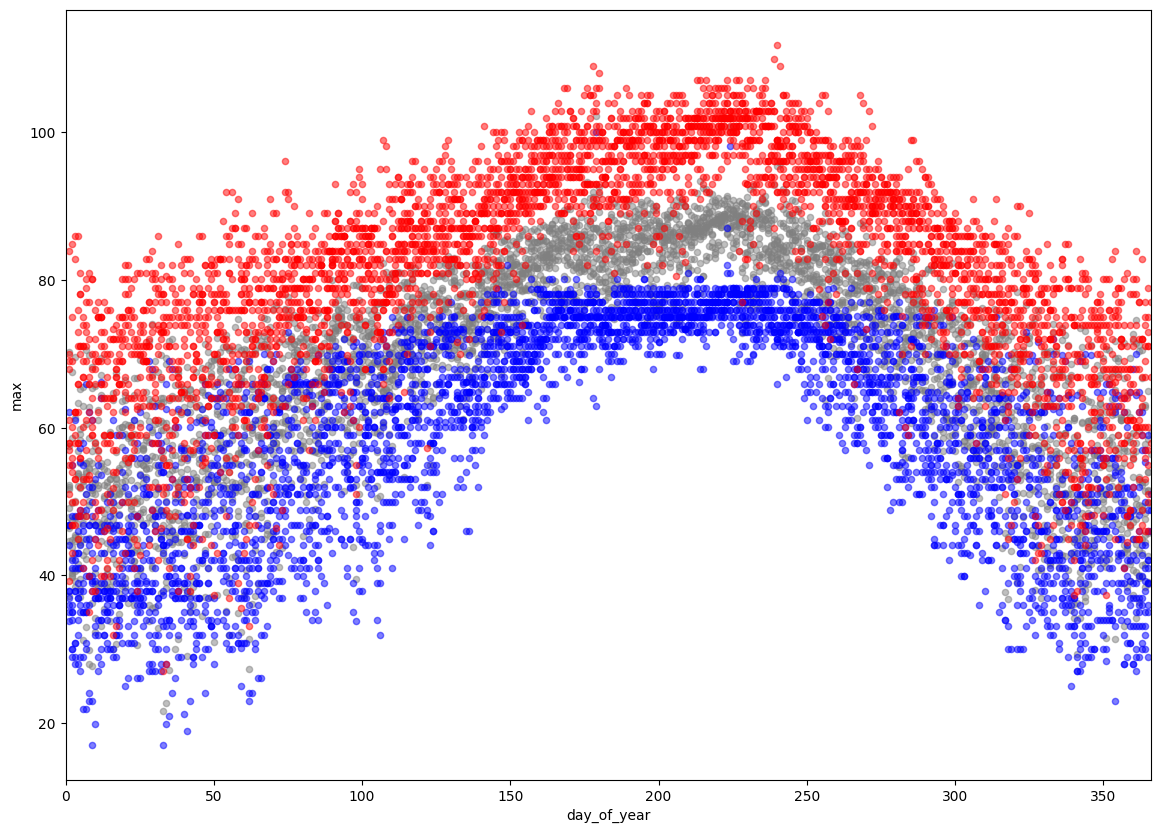

In [4]:
alpha = 0.5
ax = df.plot(kind='scatter', x='day_of_year', y='temp', alpha=alpha, color='gray');
df.plot(kind='scatter', x='day_of_year', y='min', color='blue', alpha=alpha, ax=ax);
df.plot(kind='scatter', x='day_of_year', y='max', alpha=alpha, color='red', ax=ax);
ax.get_figure().set_size_inches(14, 10)
ax.set_xlim(0, 366)

This doesn’t quite help us answer our question, though. Where are September and October. Let’s plot a black line for the 2006 music festival weekend and a blue line for the 2010 music festival weekend.

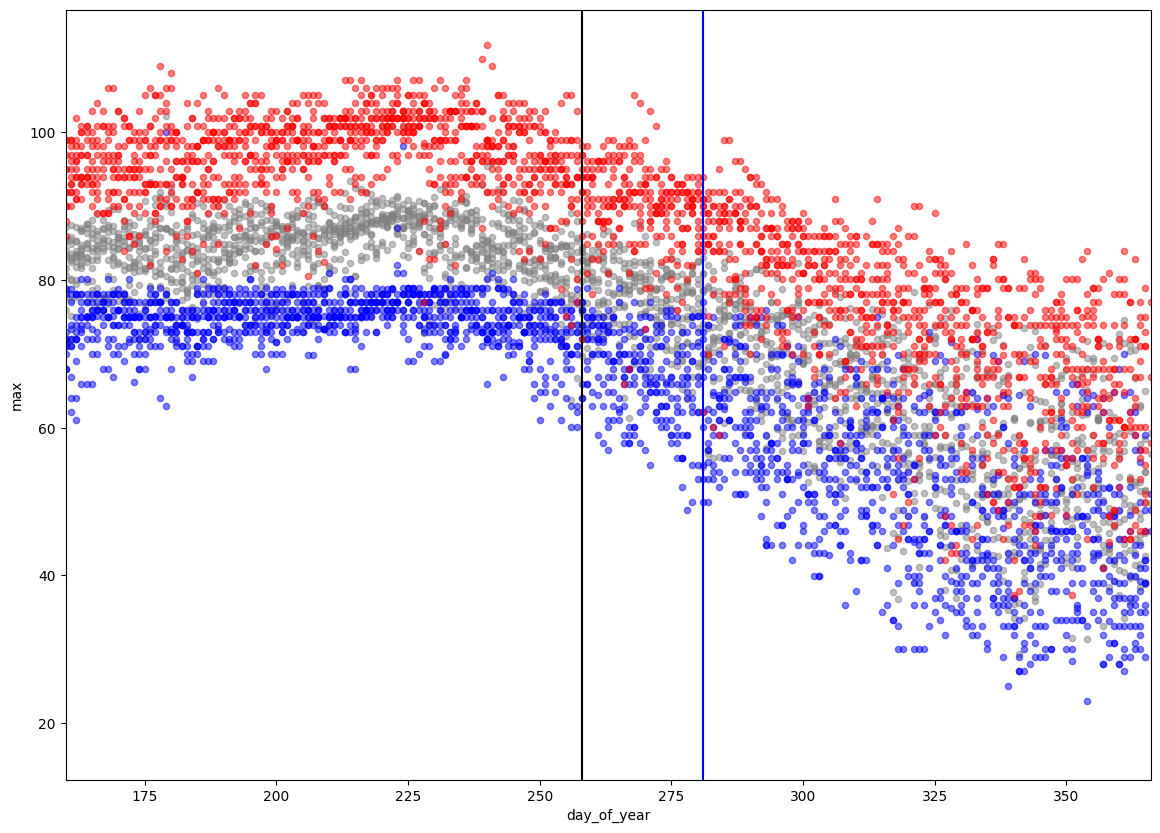

In [5]:
ax.axvline(x=datetime.datetime(2006, 9, 15).timetuple().tm_yday, color='k')
ax.axvline(x=datetime.datetime(2010, 10, 8).timetuple().tm_yday, color='b')
ax.set_xlim(160, 366)
ax.get_figure()

We do see a clear downward trend in temperatures between the two dates, but it’s not an extreme difference. I find it unlikely that temperature was the main deciding factor in choosing the October festival dates.